# JupyFluo @ SIRIUS

In [1]:
# Run this cell

import FrontendFunctions as FF
import AnalysisFunctions as AF
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Javascript, display
import xraydb

# Comment/uncomment this line to have cell collapse or not (should restart Jupyter when changed)
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}'))

class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment.
    """
    def __init__(self):
        pass
    
# GENERAL PARAMETERS
expt = Experiment() 

# Name of the notebook (necessary for saving in pdf)
expt.notebook_name = 'JupyFluo.ipynb'

# Directory where the data will be saved
expt.working_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/working/"

# Directory where the nexus files are 
expt.recording_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/recording/"

FF.Check_files(expt)
FF.Create_cell(code='scan = FF.Set_scan(expt)', position='at_bottom', celltype='code', is_print=False, is_execute = True)

<IPython.core.display.Javascript object>

Versions of modules used:
AnalysisFunctions: 0.6
FrontendFunctions: 0.11
PyNexus: v4.1
Check that you are using the last versions of the modules and read the manual on:
https://github.com/ArnaudHemmerle/JupyFluo



<IPython.core.display.Javascript object>

# SIRIUS_Fluo_2020_07_07_0070

Describe the scan here.

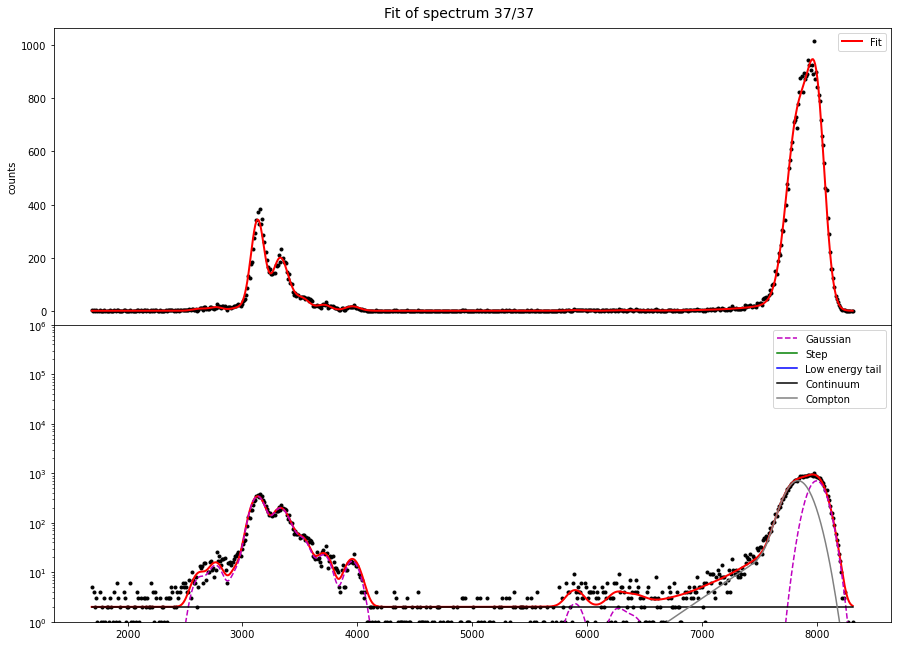

####################################################
Fits are done. Results shown below.
####################################################



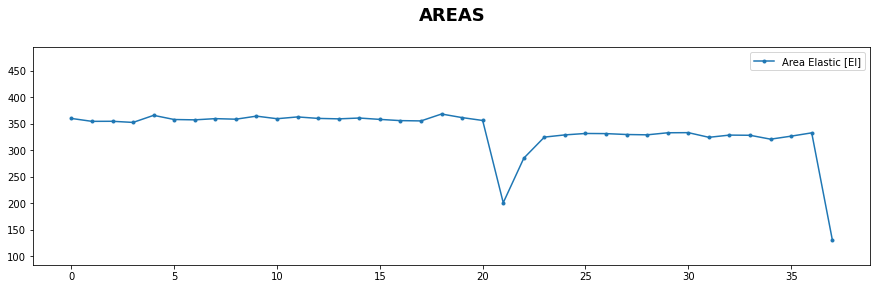

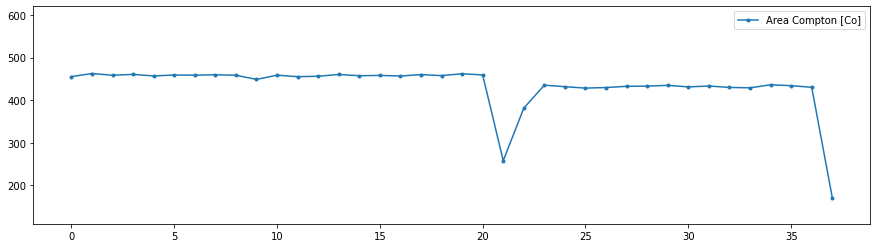

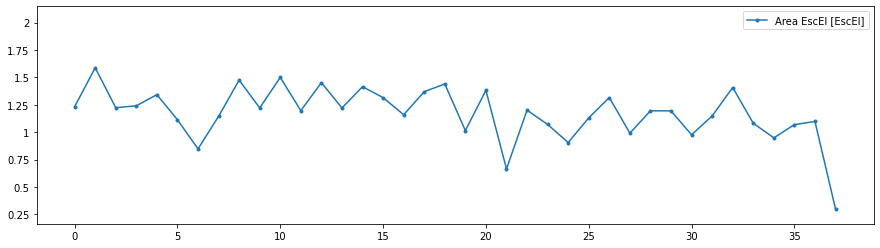

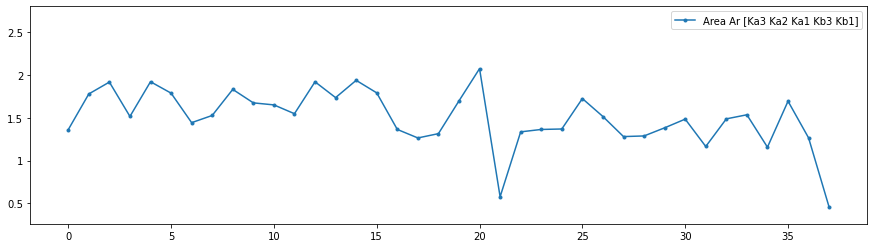

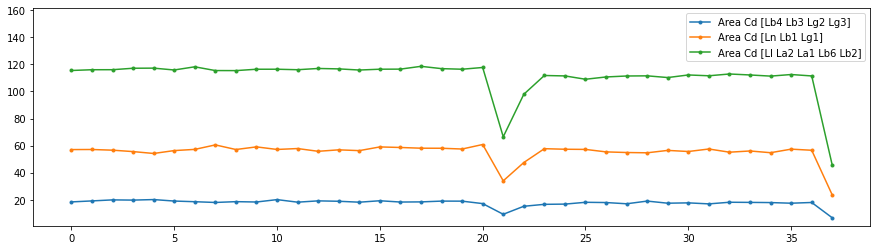

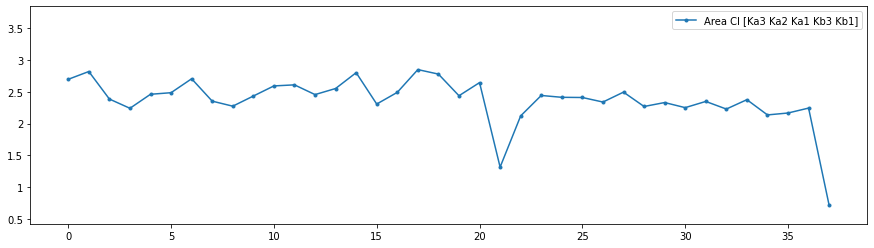

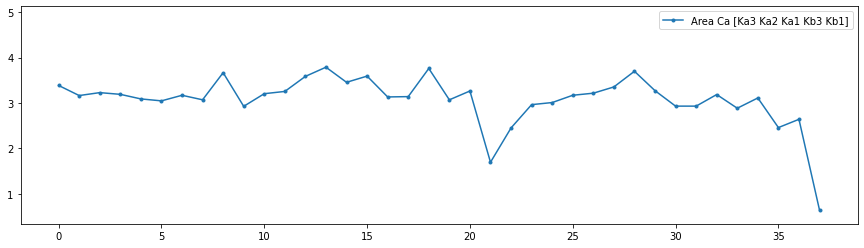

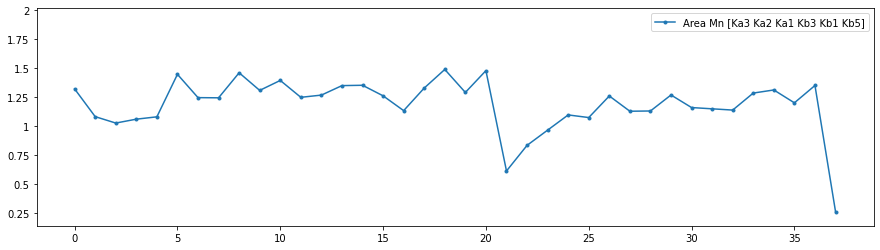

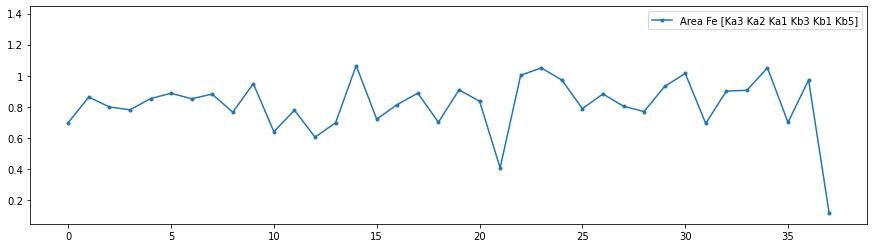

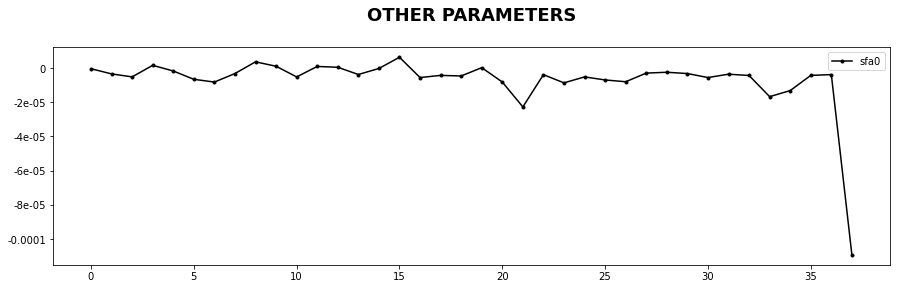

#####################################################
Results are saved in:
/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyFluo/working/SIRIUS_Fluo_2020_07_07_0070/FitResults.csv


----------------------------------------------------------------------------------------------------
Set parameters:


----------------------------------------------------------------------------------------------------
Set peaks:


----------------------------------------------------------------------------------------------------
Fit:


----------------------------------------------------------------------------------------------------
Export in progress...


In [3]:
FF.Display_panel(expt)